# Example: Static inverse free-boundary equilibrium calculations (in ITER)

---

Here we will generate an equilibrium (find coil currents with the inverse solver) in an ITER-like tokamak. 

The machine description comes from files located [here](https://github.com/ProjectTorreyPines/FUSE.jl).

The equilbirium\profile parameters are **completely made up** - please experiment on your own and change them to more realistic values as you please!

### Import packages

In [1]:
import os
import matplotlib.pyplot as plt
import freegs4e
import numpy as np

### Create the machine object

In [2]:
# set paths
os.environ["ACTIVE_COILS_PATH"] = f"../machine_configs/ITER/ITER_active_coils.pickle"
os.environ["PASSIVE_COILS_PATH"] = f"../machine_configs/ITER/ITER_passive_coils.pickle"
os.environ["WALL_PATH"] = f"../machine_configs/ITER/ITER_wall.pickle"
os.environ["LIMITER_PATH"] = f"../machine_configs/ITER/ITER_limiter.pickle"

In [3]:
# Now the machine can actually be built:
from freegsnke import build_machine
tokamak = build_machine.tokamak()

No coil named Solenoid among the active coils.
No probe configuration is provided


Text(60.291666666666664, 0.5, 'Height, $Z$ [m]')

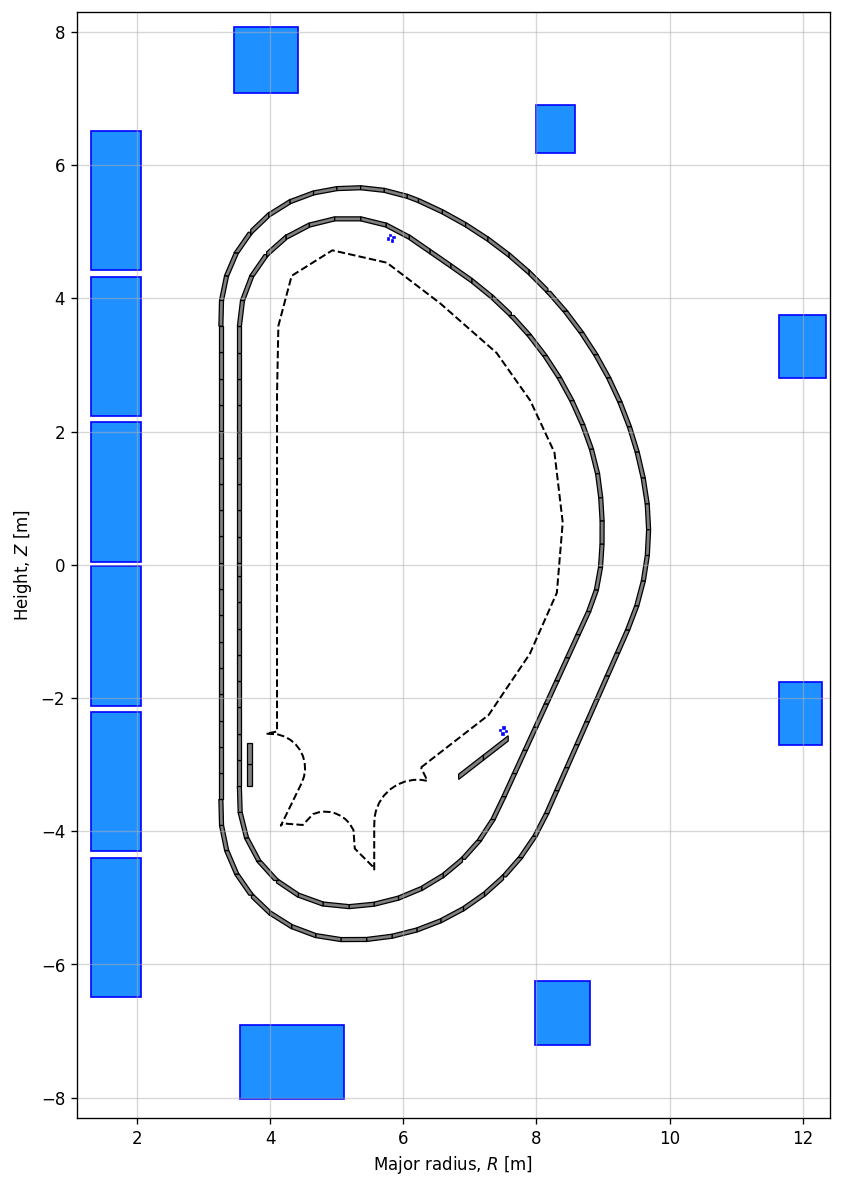

In [4]:
# plot the machine
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 15), dpi=120)
plt.tight_layout()

tokamak.plot(axis=ax1, show=False)
ax1.plot(tokamak.limiter.R, tokamak.limiter.Z, color='k', linewidth=1.2, linestyle="--")
# ax1.plot(tokamak.wall.R, tokamak.wall.Z, color='k', linewidth=1.2, linestyle="-")

ax1.grid(alpha=0.5)
ax1.set_aspect('equal')
ax1.set_xlim(1.1, 12.4)
ax1.set_ylim(-8.3, 8.3)
ax1.set_xlabel(r'Major radius, $R$ [m]')
ax1.set_ylabel(r'Height, $Z$ [m]')

### Instantiate an equilibrium

In [5]:
from freegsnke import equilibrium_update

eq = equilibrium_update.Equilibrium(
    tokamak=tokamak,       # provide tokamak object
    Rmin=3.2, Rmax=8.8,   # radial range
    Zmin=-5, Zmax=5,   # vertical range
    nx=129,                # number of grid points in the radial direction (needs to be of the form (2**n + 1) with n being an integer)
    ny=129,                # number of grid points in the vertical direction (needs to be of the form (2**n + 1) with n being an integer)
    # psi=plasma_psi
)

### Instantiate a profile object

In [6]:
# initialise the profiles
from freegsnke.jtor_update import ConstrainBetapIp
profiles = ConstrainBetapIp(
    eq=eq,        # equilibrium object
    betap=0.15,   # poloidal beta
    Ip=11e6,      # plasma current
    fvac=0.5,     # fvac = rB_{tor}
    alpha_m=2.0,  # profile function parameter
    alpha_n=1.0   # profile function parameter
)

### Load the static nonlinear solver

In [7]:
from freegsnke import GSstaticsolver
GSStaticSolver = GSstaticsolver.NKGSsolver(eq)    

### Constraints

In [8]:
Rx = 5.13      # X-point radius
Zx = -3.16      # X-point height

# set desired null_points locations
# this can include X-point and O-point locations
null_points = [[Rx], [Zx]]

# set desired isoflux constraints with format 
# isoflux_set = [isoflux_0, isoflux_1 ... ] 
# with each isoflux_i = [R_coords, Z_coords]
isoflux_set = np.array([[[Rx, 4.22, 4.35, 7.26, 7.91, 8.14, 7.47, 6.05, 4.85, 4.28, 5.4, 4.3], [Zx, 0.55, -1.45, -1.94, -0.77, 0.55, 2.55, 3.74, 3.78, 2.50, -4.5, -3.9]]])
           

# instantiate the freegsnke constrain object
from freegsnke.inverse import Inverse_optimizer
constrain = Inverse_optimizer(null_points=null_points,
                              isoflux_set=isoflux_set)


# remove from the coils available for control the radial field coil 
eq.tokamak['VS3'].control = False


### The inverse solve

Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 1149479051.6477458
Control currents updated. Relative update of tokamak_psi in the core of: 1149479051.6477458
Magnetic constraint losses = 0.45236269105290183
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  176.28284611653632
-----
Picard iteration: 0
Update too large, resized.
...relative error =  85.07034358967594
Iteration 1 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.16184304332676236
Control currents updated. Relative update of tokamak_psi in the core of: 0.16184304332676236
Magnetic constraint losses = 1.0480349675021479
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  91.38777483736102
-----
Picard iteration: 0
Update too large, resized.
...relative error

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 85.07034358967594.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 40.40290736328982.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0005583802014912058 with less than 1 iterations. Last relative psi change: 25.044384454546325.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 17.685568127008036.
  warnings.warn(
/U

Iteration 5 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.3056292336696528
Control currents updated. Relative update of tokamak_psi in the core of: 0.3056292336696528
Magnetic constraint losses = 2.6541514490739777
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  4.6797392022659094
-----
Picard iteration: 0
Update too large, resized.
...relative error =  8.643393961766714
Iteration 6 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.19193639385185648
Control currents updated. Relative update of tokamak_psi in the core of: 0.19193639385185648
Magnetic constraint losses = 3.603243664247726
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  9.919252806024705
-----
Picard iteration: 0
Update too large, resize

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 5.950091861448173.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 3.9825378636282904.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 2.6005449188389087.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 1.593395224130476.
  warnings.warn(
/Users/zn8047/Docu

Initial guess for plasma_psi successful, residual found.
Initial relative error =  1.628559950300402
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.8580511536622051
Iteration 11 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.005883598899687885
Control currents updated. Relative update of tokamak_psi in the core of: 0.005883598899687885
Magnetic constraint losses = 11.068926418324299
Handing off to forward_solve. Requested tolerance: 5.883598899687885e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.878168776096323
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.36875681346201405
Iteration 12 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.20173273014001575
Control currents updated. Relative update of tokamak_psi in the core of: 0.20173273014001575
Magnetic constraint losses = 13.322410

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.08754758157884758.
  warnings.warn(


-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09369289536310321
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.0770081379732358
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.07769967137873449
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09309666666138193
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08221350323842107
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear r

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00017847871106771253 with less than 10.0 iterations. Last relative psi change: 0.1241889460200022.
  warnings.warn(


Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.1241895290487299
-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.13572554062143638
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1269733493248051
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.14039957615023868
Discarding 'primary' Xpoint! Please check final result
Discarding 'primary' Xpoint! Please check final result
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.14139109340850584
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear r

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00014890734790990023 with less than 10.0 iterations. Last relative psi change: 0.10345014070342436.
  warnings.warn(


Iteration 15 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.006446550803220963
Control currents updated. Relative update of tokamak_psi in the core of: 0.006255081797814497
Magnetic constraint losses = 11.162604074303903
Handing off to forward_solve. Requested tolerance: 6.255081797814496e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.10045442981991015
-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.07182005871013682
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08871408319645176
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09096138815482131
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direc

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 6.255081797814496e-05 with less than 10.0 iterations. Last relative psi change: 0.12394634519705301.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 4.945897768654693e-05 with less than 10.0 iterations. Last relative psi change: 0.15539085396456379.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12408814216094394
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10923428872235608
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10176548291926463
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10491735920487916
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10870627961983025
-----
Newton-Krylov iteration: 5
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.1335071446808472
-----
Newton-Krylov iteration: 6
Update too large, resized.
New s

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0001463630381406804 with less than 10.0 iterations. Last relative psi change: 0.14631948201710085.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0001832551259983755 with less than 10.0 iterations. Last relative psi change: 0.17439081220000138.
  warnings.warn(


-----
Picard iteration: 7
...relative error =  0.16426036175974634
-----
Picard iteration: 8
...relative error =  0.17065396129193197
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.17439081220000138
Iteration 19 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.012595219769054446
Control currents updated. Relative update of tokamak_psi in the core of: 0.01173956789600873
Magnetic constraint losses = 32.07610684409128
Handing off to forward_solve. Requested tolerance: 0.0001173956789600873
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.1536264535481109
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.14587830205387836
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1323241649445513
-----
Newton-Krylov iteration: 2
Update too large, resized.
Increase in re

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0001173956789600873 with less than 10.0 iterations. Last relative psi change: 0.18399418397065484.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.18049206939598805.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.06812306574075352.
  warnings.warn(


-----
Newton-Krylov iteration: 0
...relative error =  0.06812306574075352
Iteration 22 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.003564786637539135
Control currents updated. Relative update of tokamak_psi in the core of: 0.0032893879565567817
Magnetic constraint losses = 22.072039348623345
Handing off to forward_solve. Requested tolerance: 3.289387956556782e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.1445582921715681
-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.13215819079912555
-----
Newton-Krylov iteration: 1
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.1549143119145595
-----
Picard iteration: 2
Update too large, resized.
...relative error =  0.13198868573400027
-----
Newton-Krylov iteration: 3
Update too large, resized.
Increase in re

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.289387956556782e-05 with less than 10.0 iterations. Last relative psi change: 0.15556310311030702.
  warnings.warn(


-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12470031644159232
-----
Newton-Krylov iteration: 7
Update too large, resized.
...relative error =  0.17548508128004578
-----
Picard iteration: 8
Update too large, resized.
...relative error =  0.14107696843933784
-----
Newton-Krylov iteration: 9
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.15313102262026076
Iteration 24 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.0047037346533603
Control currents updated. Relative update of tokamak_psi in the core of: 0.004253973306096807
Magnetic constraint losses = 42.09562337162379
Handing off to forward_solve. Requested tolerance: 4.253973306096807e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.10509311318681505


/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00010497632790129335 with less than 10.0 iterations. Last relative psi change: 0.15313102262026076.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08264594279439201
-----
Newton-Krylov iteration: 1
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.09619188809473697
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08065057825740718
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09354510764247889
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09629249314891883
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09104587176928355
-----
New

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 4.253973306096807e-05 with less than 10.0 iterations. Last relative psi change: 0.13002915539206517.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.39318696911306e-05 with less than 10.0 iterations. Last relative psi change: 0.21418306301368467.
  warnings.warn(


-----
Picard iteration: 7
Update too large, resized.
...relative error =  0.25423300088870987
-----
Picard iteration: 8
Update too large, resized.
...relative error =  0.24034557935467826
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.21418306301368467
Iteration 26 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.2689696943206697
Control currents updated. Relative update of tokamak_psi in the core of: 0.2689696943206697
Magnetic constraint losses = 57.10872477642902
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.2427964128243761
-----
Picard iteration: 0
...relative error =  0.20666727709632532
Iteration 27 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.09563598071517544
Control currents updated. Relative update of tokamak_psi in the core of: 0.095635980715175

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.20666727709632532.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0009563598071517544 with less than 1 iterations. Last relative psi change: 0.13541229954445796.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10924649897573295
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12439314343101068
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1356310303311708
Discarding 'primary' Xpoint! Please check final result
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12047293265521986
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10797049490264649
-----
Newton-Krylov iteration: 5
Update too large, 

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 6.304233101076181e-05 with less than 10.0 iterations. Last relative psi change: 0.099691930385705.
  warnings.warn(


-----
Newton-Krylov iteration: 1
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.08592382751422553
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.06461354232184288
-----
Newton-Krylov iteration: 3
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.09179232922528172
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.06848475305173449
-----
Newton-Krylov iteration: 5
Increase in residual, update reduction triggered.
...relative error =  0.07401614374169278
-----
Newton-Krylov iteration: 6
...relative error =  0.07223382916167029
-----
Newton-Krylov iteration: 7
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.057348506424698346
-----
Newton-Krylov iteratio

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.3392439599480666e-05 with less than 10.0 iterations. Last relative psi change: 0.05514417558484849.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 7.387596151416039e-05 with less than 10.0 iterations. Last relative psi change: 0.1548212360176248.
  warnings.warn(


Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.2635845412798228
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.2349065814076006
-----
Picard iteration: 1
Update too large, resized.
...relative error =  0.2135841076121771
-----
Picard iteration: 2
Update too large, resized.
...relative error =  0.19623506268496646
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.17848533341349535
-----
Picard iteration: 4
Update too large, resized.
...relative error =  0.16288096071086708
-----
Picard iteration: 5
Update too large, resized.
...relative error =  0.14107708620464493
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1228418141082202
-----
Newton-Krylov iteration: 7
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.13466261249091918
-----
Newton-Krylov ite

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0002115886213246351 with less than 10.0 iterations. Last relative psi change: 0.14433682570019538.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09040437921648274
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.0892956974091183
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08642438140612832
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10655705992860658
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11566555677148493
-----
Newton-Krylov iteration: 7
Update too large, resized.
New starting_direction used due to collinear r

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 8.616692267814384e-05 with less than 10.0 iterations. Last relative psi change: 0.12612402185075344.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Increase in residual, update reduction triggered.
...relative error =  0.006749017788761836
-----
Newton-Krylov iteration: 3
Increase in residual, update reduction triggered.
...relative error =  0.008162535836701361
-----
Newton-Krylov iteration: 4
Increase in residual, update reduction triggered.
...relative error =  0.01154583264387608
-----
Newton-Krylov iteration: 5
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.01886476050455641
-----
Newton-Krylov iteration: 6
Increase in residual, update reduction triggered.
...relative error =  0.016791377139692035
-----
Newton-Krylov iteration: 7
New starting_direction used due to collinear residuals.
...relative error =  0.016576278220445436
-----
Newton-Krylov iteration: 8
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.017838254181608334
-----
Newton-Krylov iteration: 9
...relative error =  0.01127471997

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.3432709287524515e-05 with less than 10.0 iterations. Last relative psi change: 0.011274719975623938.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.0889084601012165
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10091608771705066
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10406104664329306
-----
Newton-Krylov iteration: 5
Update too large, resized.
...relative error =  0.09475376795311033
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.0669857981798119
-----
Newton-Krylov iteration: 7
...relative error =  0.05998437979161791
-----
Newton-Krylov iteration: 8
Update too large, resized.
...relative error =  0.02752847838510342
-----
Newton-Krylov iteration: 9
Update too large, resized.
...relative error =  0.009841900135585

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.499771733831708e-05 with less than 10.0 iterations. Last relative psi change: 0.009841900135585318.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09982449155770642
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11785991237038286
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11863583964950389
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11364061334626376
-----
Newton-Krylov iteration: 4
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.1376418050667931
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residua

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 6.243829571242245e-05 with less than 10.0 iterations. Last relative psi change: 0.0826609954468977.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.692793569590194e-05 with less than 10.0 iterations. Last relative psi change: 0.20556246552968366.
  warnings.warn(


-----
Picard iteration: 8
...relative error =  0.19693390268754332
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.20556246552968366
Iteration 37 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 1.196826927746536
Control currents updated. Relative update of tokamak_psi in the core of: 1.196826927746536
Magnetic constraint losses = 32.323277741362745
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.23634429905773105
-----
Picard iteration: 0
...relative error =  0.2118792569488738
Iteration 38 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.08341620240321386
Control currents updated. Relative update of tokamak_psi in the core of: 0.08341620240321386
Magnetic constraint losses = 23.035222812574137
Handing off to forward_solve. Requested tolerance: 0.000834162024032138

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.2118792569488738.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0008341620240321386 with less than 1 iterations. Last relative psi change: 0.07543505322973376.
  warnings.warn(


-----
Picard iteration: 1
...relative error =  0.17437029179187769
-----
Picard iteration: 2
...relative error =  0.1770477810707829
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.20824829480924875
-----
Picard iteration: 4
...relative error =  0.2103026596670441
-----
Picard iteration: 5
...relative error =  0.21346016206009627
-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.24681639404113656
-----
Picard iteration: 7
...relative error =  0.24935446628702398
-----
Picard iteration: 8
...relative error =  0.2512192194174676
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.27461391596797474
Iteration 40 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.1670720481085913
Control currents updated. Relative update of tokamak_psi in the core of: 0.1670720481085913
Magnetic constraint losses = 16.615373885684374
Handing off to forward_solve. Requested toleranc

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.400380545247717e-05 with less than 10.0 iterations. Last relative psi change: 0.27461391596797474.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.1295282762295321.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
...relative error =  0.1295282762295321
Iteration 41 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.0051362129286074455
Control currents updated. Relative update of tokamak_psi in the core of: 0.004117345397957655
Magnetic constraint losses = 26.11214374730174
Handing off to forward_solve. Requested tolerance: 4.1173453979576554e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.20333204317034037
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.18703512502630754
-----
Picard iteration: 1
Update too large, resized.
...relative error =  0.17632724926202348
-----
Picard iteration: 2
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.1991355181323046
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.20323543070676608
-----
Picard iteration:

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 4.1173453979576554e-05 with less than 10.0 iterations. Last relative psi change: 0.14574377218406723.
  warnings.warn(


-----
Newton-Krylov iteration: 7
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1323323427104597
-----
Newton-Krylov iteration: 8
Update too large, resized.
...relative error =  0.14963314696070243
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 9
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.14959419969941468
Iteration 43 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.00379134804017896
Control currents updated. Relative update of tokamak_psi in the core of: 0.0029787792793608977
Magnetic constraint losses = 40.61083235861151
Handing off to forward_solve. Requested tolerance: 2.9787792793608978e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.09295919426263732
-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_directi

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0001192572400871911 with less than 10.0 iterations. Last relative psi change: 0.14959419969941468.
  warnings.warn(


-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.07429946685765708
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.0793485848992643
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08109378529802798
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08787635907853357
-----
Newton-Krylov iteration: 5
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.11151129954586542
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.07252764345711714
-----
Newton-Krylov iteration: 7
Update too large, resized.
New s

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.9787792793608978e-05 with less than 10.0 iterations. Last relative psi change: 0.10722794238757317.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.14078432994925774
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1550522909365148
-----
Picard iteration: 4
Update too large, resized.
...relative error =  0.14199145144384967
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.15096373316485873
-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.15798588390316173
-----
Picard iteration: 7
Update too large, resized.
...relative error =  0.17398307273803498
-----
Picard iteration: 8
...relative error =  0.18542760376985973
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.11587209388738685


/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 7.386088075144465e-05 with less than 10.0 iterations. Last relative psi change: 0.11587209388738685.
  warnings.warn(


Iteration 45 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.005400354695926724
Control currents updated. Relative update of tokamak_psi in the core of: 0.0041585061185150565
Magnetic constraint losses = 32.50269086004659
Handing off to forward_solve. Requested tolerance: 4.158506118515056e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.13930004431746107
-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1169689816903579
-----
Newton-Krylov iteration: 1
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.12779294625889104
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1193358262943297
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 4.158506118515056e-05 with less than 10.0 iterations. Last relative psi change: 0.16637565830896006.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 1.61080892554536e-05 with less than 10.0 iterations. Last relative psi change: 0.19777958388628.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0007997158719165497 with less than 1 iterations. Last relative psi change: 0.21355624575031554.
  warnings.warn(


Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.23797747397608512
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.2253187870612168
-----
Picard iteration: 1
Update too large, resized.
...relative error =  0.21475575787056558
-----
Picard iteration: 2
Update too large, resized.
...relative error =  0.20846720602323535
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.2307585623670833
-----
Picard iteration: 4
Update too large, resized.
...relative error =  0.24069405745013805
-----
Picard iteration: 5
Update too large, resized.
...relative error =  0.2409397306752179
-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.23479708363718982
-----
Picard iteration: 7
Update too large, resized.
...relative error =  0.22457370825398335
-----
Picard iteration: 8
Update too large, resized.
...relative error =  0.21855963273561102
-----
Picard iteration: 9
Update too large, resized.
.

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.17855567497009808.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.059621180085634495
-----
Newton-Krylov iteration: 3
New starting_direction used due to collinear residuals.
...relative error =  0.03540887061484519
-----
Newton-Krylov iteration: 4
Increase in residual, update reduction triggered.
...relative error =  0.044724350397818684
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.037264580578766374
-----
Newton-Krylov iteration: 6
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.03898521662746188
-----
Newton-Krylov iteration: 7
Update too large, resized.
...relative error =  0.04555525071332466
-----
Newton-Krylov iteration: 8
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.04598821675874357
-----
Newton-Krylov iterat

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 4.291496984023392e-05 with less than 10.0 iterations. Last relative psi change: 0.051258352680312085.
  warnings.warn(


Iteration 50 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.006594155974507703
Control currents updated. Relative update of tokamak_psi in the core of: 0.004926969329822128
Magnetic constraint losses = 12.180946788087066
Handing off to forward_solve. Requested tolerance: 4.9269693298221274e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.07057059127030008
-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.05155693144449421
-----
Newton-Krylov iteration: 1
Update too large, resized.
...relative error =  0.07186702540050804
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.05250829304450087
-----
Newton-Krylov iteration: 3
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 4.9269693298221274e-05 with less than 10.0 iterations. Last relative psi change: 0.030419708102576465.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.06986539274261261
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.06954149607292791
-----
Newton-Krylov iteration: 2
Increase in residual, update reduction triggered.
...relative error =  0.07632529717869219
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.05463111574905637
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.06706549034932635
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.0690575509892318
-----
Newton-Krylov iteration: 6
Increase in residual, update reduction triggered.
...relati

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.0266255669219073e-05 with less than 10.0 iterations. Last relative psi change: 0.02103504235331604.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 5.325916352166256e-05 with less than 10.0 iterations. Last relative psi change: 0.19546453550844414.
  warnings.warn(


Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.24791753750683918
-----
Picard iteration: 0
...relative error =  0.1600708820360979
Iteration 54 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.0027079834734484052
Control currents updated. Relative update of tokamak_psi in the core of: 0.0019632347683489395
Magnetic constraint losses = 23.349801592954663
Handing off to forward_solve. Requested tolerance: 1.9632347683489395e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.10003561754113775
-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09460695671330782
-----
Newton-Krylov iteration: 1
Update too large, resized.
...relative error =  0.08925635972083898


/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.1600708820360979.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08110814836088519
-----
Newton-Krylov iteration: 3
...relative error =  0.0803713200135861
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.06523919343516414
-----
Newton-Krylov iteration: 5
Increase in residual, update reduction triggered.
...relative error =  0.08123275379651841
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.06030209480838811
-----
Newton-Krylov iteration: 7
Increase in residual, update reduction triggered.
...relative error =  0.08072802111497417
-----
Newton-Krylov iteration: 8
Update too large, resized.
...relative error =  0.04771067979009539
-----
Newton-Krylov iteration: 9
Update too large, resized.
...relative error =  0.022450621859836414
Itera

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 1.9632347683489395e-05 with less than 10.0 iterations. Last relative psi change: 0.022450621859836414.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1307770933469269
-----
Newton-Krylov iteration: 1
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.15238590306352867
-----
Picard iteration: 2
Update too large, resized.
...relative error =  0.14047933286446526
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12867168007356808
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.14367345649706467
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.16835176849755842
-----
Picard itera

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.6828677637007005e-05 with less than 10.0 iterations. Last relative psi change: 0.12889060148923265.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Increase in residual, update reduction triggered.
...relative error =  0.06549442182182127
-----
Newton-Krylov iteration: 1
Increase in residual, update reduction triggered.
...relative error =  0.07889194851252081
-----
Newton-Krylov iteration: 2
Increase in residual, update reduction triggered.
...relative error =  0.13867239109149007
-----
Newton-Krylov iteration: 3
Increase in residual, update reduction triggered.
...relative error =  0.19927059454607962
-----
Picard iteration: 4
...relative error =  0.10596668704136446
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 5
Increase in residual, update reduction triggered.
...relative error =  0.16305564721214744
-----
Picard iteration: 6
...relative error =  0.13549117211573236
Discarding 'primary' Xpoint! Please check final result
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 7
...relative error =  0.06454060472355605
-----
N

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 1e-05 with less than 10.0 iterations. Last relative psi change: 0.05459950093209004.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.015566000639726e-05 with less than 10.0 iterations. Last relative psi change: 0.17491045090374127.
  warnings.warn(


-----
Picard iteration: 8
...relative error =  0.21482563052047882
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.17491045090374127
Iteration 58 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.0034902550549983542
Control currents updated. Relative update of tokamak_psi in the core of: 0.002430659754665195
Magnetic constraint losses = 30.300838924657125
Handing off to forward_solve. Requested tolerance: 2.4306597546651947e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.21348144078502865
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.2045180034430108
-----
Picard iteration: 1
...relative error =  0.20175099635103075
-----
Picard iteration: 2
...relative error =  0.20435420512612332
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.1735427889449593
-----
Picard iteration: 4
...relative error =  0.16534417063215667

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.4306597546651947e-05 with less than 10.0 iterations. Last relative psi change: 0.18090551294369672.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.15239637062661895.
  warnings.warn(


Iteration 59 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.1843558116586288
Control currents updated. Relative update of tokamak_psi in the core of: 0.1843558116586288
Magnetic constraint losses = 38.462925080430225
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.21613202168651094
-----
Picard iteration: 0
...relative error =  0.15239637062661895
Iteration 60 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.00182873291550386
Control currents updated. Relative update of tokamak_psi in the core of: 0.0012608182368928297
Magnetic constraint losses = 20.56982912540838
Handing off to forward_solve. Requested tolerance: 1.2608182368928297e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.10185093344113828
-----
Newton-Krylov iteration: 0
Update too large, 

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 1.2608182368928297e-05 with less than 10.0 iterations. Last relative psi change: 0.011654830260526253.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.13741975264515338
-----
Newton-Krylov iteration: 3
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.15302655229152543
-----
Picard iteration: 4
Update too large, resized.
...relative error =  0.1424742834629045
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.14413293323518608
-----
Newton-Krylov iteration: 6
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.1582217673767722
-----
Picard iteration: 7
Update too large, resized.
...relative error =  0.14034583321660815
-----
Newton-Krylov iteration: 8
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.148258317311732
-----
Newton-Krylov iteration: 9
Update too

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 1.682138006364972e-05 with less than 10.0 iterations. Last relative psi change: 0.16007585771390975.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 1.1956420349339699e-05 with less than 10.0 iterations. Last relative psi change: 0.16838912621387866.
  warnings.warn(


-----
Picard iteration: 2
Update too large, resized.
...relative error =  0.20443845659490875
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.19330819235603922
-----
Picard iteration: 4
Update too large, resized.
...relative error =  0.19670095195299536
-----
Picard iteration: 5
Update too large, resized.
...relative error =  0.19945700862719334
-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.19557197438268495
-----
Picard iteration: 7
Update too large, resized.
...relative error =  0.1943764012701086
-----
Picard iteration: 8
Update too large, resized.
...relative error =  0.18825092541333743
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.16838912621387866
Iteration 63 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.005349631767662242
Control currents updated. Relative update of tokamak_psi in the core of: 0.003578752571313237
Magnetic constraint lo

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:593: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.578752571313237e-05 with less than 10.0 iterations. Last relative psi change: 0.12493971681995313.
  warnings.warn(


-----
Newton-Krylov iteration: 3
...relative error =  0.013262925643913999
-----
Newton-Krylov iteration: 4
...relative error =  0.0037814932874875203
-----
Newton-Krylov iteration: 5
...relative error =  0.0005610338699199865
-----
Newton-Krylov iteration: 6
...relative error =  0.0001536895218362825
-----
Newton-Krylov iteration: 7
...relative error =  1.2854526488896705e-05
-----
Newton-Krylov iteration: 8
...relative error =  4.306751728838409e-06
Forward static solve complete. Last relative residual: 4.306751728838409e-06
 
Iteration 65 complete.
Static solve complete.
Last update to the control currents caused a relative update of tokamak_psi in the core of: 0.00046682754072845003.
Last relative GS residual: 4.306751728838409e-06


(-8.3, 8.3)

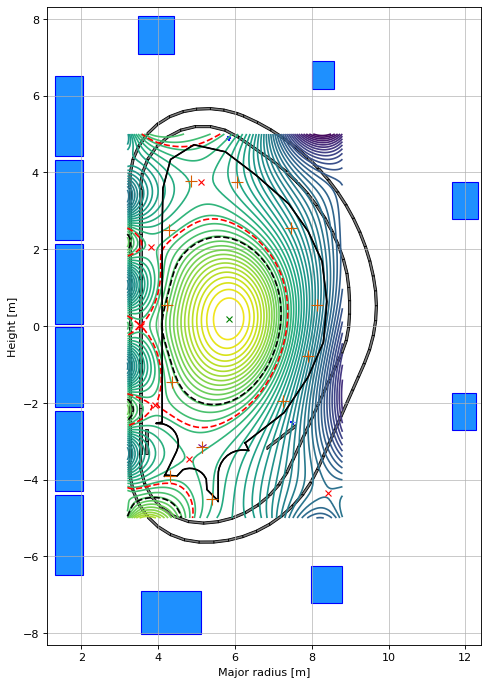

In [9]:
GSStaticSolver.inverse_solve(eq=eq, 
                     profiles=profiles, 
                     constrain=constrain, 
                     target_relative_tolerance=1e-5,
                     target_relative_psit_update=1e-3,
                     max_iter_per_update=10,
                     max_rel_update_size=0.075,
                     damping_factor=.99,
                     max_rel_psit=.05,
                     verbose=True, # print output
                     l2_reg=1e-14,
                     )

fig1, ax1 = plt.subplots(1, 1, figsize=(7, 15), dpi=80)

ax1.grid(zorder=0, alpha=0.75)
ax1.set_aspect('equal')
eq.tokamak.plot(axis=ax1,show=False)                                                          # plots the active coils and passive structures
ax1.fill(tokamak.wall.R, tokamak.wall.Z, color='k', linewidth=1.2, facecolor='w', zorder=0)   # plots the limiter
eq.plot(axis=ax1,show=False)                                                                  # plots the equilibrium
constrain.plot(axis=ax1, show=False)                                                          # plots the contraints
ax1.set_xlim(1.1, 12.4)
ax1.set_ylim(-8.3, 8.3)


In [10]:
eq.tokamak.getCurrents()

# # save coil currents to file
# import pickle
# with open('simple_diverted_currents_PaxisIp.pk', 'wb') as f:
#     pickle.dump(obj=inverse_current_values, file=f)

{'CS1': -916240169.5031351,
 'CS2': -878874629.9237533,
 'CS3': -1154706427.123091,
 'VS3': 0.0,
 'PF1': -245654120.6336851,
 'PF2': -44564685.45594211,
 'PF3': -18121815.069925826,
 'PF4': -24208208.814537957,
 'PF5': -39078064.866639405,
 'PF6': -213816104.26669168,
 'I1_0': 0.0,
 'I2_0': 0.0,
 'I3_0': 0.0,
 'I4_0': 0.0,
 'I5_0': 0.0,
 'I6_0': 0.0,
 'I7_0': 0.0,
 'I8_0': 0.0,
 'I9_0': 0.0,
 'I10_0': 0.0,
 'I11_0': 0.0,
 'I12_0': 0.0,
 'I13_0': 0.0,
 'I14_0': 0.0,
 'I15_0': 0.0,
 'I16_0': 0.0,
 'I17_0': 0.0,
 'I18_0': 0.0,
 'I19_0': 0.0,
 'I20_0': 0.0,
 'I21_0': 0.0,
 'I22_0': 0.0,
 'I23_0': 0.0,
 'I24_0': 0.0,
 'I25_0': 0.0,
 'I26_0': 0.0,
 'I27_0': 0.0,
 'I28_0': 0.0,
 'I29_0': 0.0,
 'I30_0': 0.0,
 'I31_0': 0.0,
 'I32_0': 0.0,
 'I33_0': 0.0,
 'I34_0': 0.0,
 'I35_0': 0.0,
 'I36_0': 0.0,
 'I37_0': 0.0,
 'I38_0': 0.0,
 'I39_0': 0.0,
 'I40_0': 0.0,
 'I41_0': 0.0,
 'I42_0': 0.0,
 'I43_0': 0.0,
 'I44_0': 0.0,
 'I45_0': 0.0,
 'I46_0': 0.0,
 'I47_0': 0.0,
 'I48_0': 0.0,
 'I49_0': 0.0,
 'I50